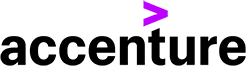


**Teste prático em Python**

## **Regras para o teste**


**Bibliotecas**

As únicas bibliotecas permitidas para uso são:

*   Todas as bibliotecas nativas
*   Pandas (https://pandas.pydata.org/docs/)
*   Numpy (https://numpy.org/doc/)
*   requests (https://requests.readthedocs.io/en/master/)

**Código**

Será levado em consideração a clareza e eficiência do seu código, assim como o processo para chegar na resposta de cada questão, sendo assim, comentários no código são bem-vindos para entender a linha de raciocínio utilizada.

**Envio**

Após a finalização do teste, enviar o arquivo .ipynb (File > Download .ipynb) para o email fabio.camelo@accenture.com com cópia para rodrigo.l.pereira@accenture.com

---

In [7]:
import pandas as pd
import numpy as np
import requests
import time

# Desafios

## **01 - Análise do comportamento de compras no ecommerce**

Foi solicitado do gerente de marketing para que você acesse a base da dados do Google Analytics para identificar questões relacionadas as compras de produtos nessa loja online.

Dado a base de dados "***canada_sessions_raw.csv***", importe-a em seu código python e responda as seguintes questões:

Estrutura da base: https://support.google.com/analytics/answer/3437719?hl=pt

**Dica**

Para essa questão, pode-se utilizar somente os seguintes campos:

*   `date` - Data da sessão
*   `transactions` - Número total de transações que aconteceram na sessão
*   `fullVisitorId` - ID único do usuário
*   `channelGroupping` - O canal de origem da sessão do usuário.

Por exemplo, para descobrir todos os acessos (sessões) de um usuário, basta agrupar o campo `date` com o `fullVisitorId`.




In [63]:
#Escreva seu código abaixo dessa linha para a questão 01
#
#
path = 'C:\\Users\\Yugur\\Desktop\\pessoal\\coursera\\canada_sessions_raw.csv'

data = pd.read_csv(path)

In [172]:
# pegar apenas os registros referentes a transacoes
buyers = data[pd.notnull(data['transactionId'])].sort_values(by=["transactionId","time"], na_position="last")

# como ha multiplos registros com o mesmo transactionId eh necessario priorizar as transacoes para nao sujar as medias
unique_transactions = buyers.drop_duplicates(subset=["transactionId"],keep="first")

# miliseconds para dia rendeu um valor demasiado pequeno, por isso utilizei hora
unique_transactions["time_hours"] = unique_transactions["time"]/(1000*60*60)

<ipython-input-172-3b6c49d62a8c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_transactions["time_hours"] = unique_transactions["time"]/(1000*60*60)


A) Qual a média, **em dias**, entre o primeiro acesso dos usuário até a primeira compra deles no site?

In [180]:
unique_transactions.groupby([True]*len(unique_transactions)).agg(avg_time_hours = ("time_hours", np.average))

,avg_time_hours
True,0.241269


O tempo médio é de 15 minutos.

B) Qual o canal (channelGrouping) que possui uma o menor tempo médio, em dias, para a transação acontecer? E qual o que possui o maior tempo?

In [174]:
unique_transactions.groupby(by=['channelGrouping']).agg(avg_time_hours = ("time_hours", np.average)).sort_values(by=["avg_time_hours"])

,avg_time_hours
channelGrouping,
Social,0.124202
Direct,0.198891
Display,0.215885
Referral,0.234870
Paid Search,0.246239
Organic Search,0.308700


In [183]:
O canal que tem a compra média mais rápida é o Social, o mais lento é o de busca orgânica.

C) Analisando os canais (channelGroupping) da base de dados, em sua opinião, qual seria o canal capaz de trazer o maior retorno em receita (transactionRevenue) e no menor tempo? 

In [182]:
unique_transactions["revenue_literal"] = unique_transactions["transactionRevenue"]/1e6
unique_transactions.groupby(by=['channelGrouping']).agg(avg_time_hours = ("time_hours", np.average), revenue = ("revenue_literal", np.sum)).sort_values(by=["avg_time_hours"])

<ipython-input-182-822661fb5d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_transactions["revenue_literal"] = unique_transactions["transactionRevenue"]/1e6


,avg_time_hours,revenue
channelGrouping,,
Social,0.124202,421.97
Direct,0.198891,54574.51
Display,0.215885,44.98
Referral,0.234870,27536.06
Paid Search,0.246239,57.98
Organic Search,0.308700,28164.82


In [ ]:
O canal com maior receita no menor tempo é o Direto. Com apenas o dobro do tempo do social ele trouxe quase o dobro dos outros canais.



---



# **02 - Busca ordenada**
Implemente a função `count_after_numbers` que aceite uma lista de números inteiros, e performaticamente conte os elementos que são maiores do que o parâmetro "`greater_than`".

Por exemplo, `count_after_numbers([55,21,36,5,2], 15)` deve retornar 3 (Pois existem 3 números maiores que 15 na lista).

Obs: Para uma melhor performance do código, deve-se primeiramente ordenar a lista de números inteiros recebida no parâmetro n_list. Para isso, implemente a função `sort_list`, utilizando o método de ordenação a sua escolha - Lembrando que a performance do código será levada em consideração para a avaliação.


In [38]:
#Escreva o código abaixo dessa linha
def count_after_numbers(n_list, greater_than):
  return sum(np.greater(np.array(n_list),greater_than))

def sort_list(n_list):
  for i in range(len(n_list)):
    for j in range(i,len(n_list)):
      if (n_list[j] <= n_list[i]):
        aux = n_list[i]
        n_list[i] = n_list[j]
        n_list[j] = aux
  return n_list

time_start = time.time()
sorted_list = np.random.rand(10000)
sorted_list = sort_list(sorted_list)
print(count_after_numbers(sorted_list, 55)) # deve imprimir 3
print(time.time() - time_start)

0
9.19999885559082


In [37]:
#Escreva o código abaixo dessa linha
def count_after_numbers(n_list, greater_than):
  return sum(np.greater(np.array(n_list),greater_than))

def sort_list(n_list):
  for i in range(len(n_list)):
    for j in range(i,len(n_list)):
      if (n_list[j] <= n_list[i]):
        aux = n_list[i]
        n_list[i] = n_list[j]
        n_list[j] = aux
  return n_list

time_start = time.time()
sorted_list = np.random.rand(10000)
# sorted_list = sort_list(sorted_list)
print(count_after_numbers(sorted_list, 55)) # deve imprimir 3
print(time.time() - time_start)

0
0.012999773025512695




---



# **03 - Troco em moedas**

Você foi escolhido para desenvolver uma solução para um caixa eletrônico de supermercado, seu programa deverá receber um número inteiro que representa os centavos do troco da compra e dizer quantas moedas deverão ser retornadas ao cliente. 

Moedas disponíveis: 
*   1 Real
*   50 Centavos
*   25 Centavos
*   10 Centavos
*   5 Centavos
*   1 Centavo

Por exemplo: Em um cenário em que o troco que o cliente deve receber é de R$5,51: `num_moedas_troco(51)` -> deverá imprimir 3 (25, 25 e 1)

In [59]:
#Escreva o código abaixo dessa linha
def num_moedas_troco(centavos):

  troco_list = []

  if centavos%100 == 0:
    um_real = [100]*int(centavos/100)
    centavos = 0
  else:
    um_real = [100]*int((centavos - centavos%100)/100)
    centavos = centavos%100

  if centavos%50 == 0:
    cinquenta = [50]*int(centavos/50)
    centavos = 0
  else:
    cinquenta = [50]*int((centavos - centavos%50)/50)    
    centavos = centavos%50

  if centavos%25 == 0:
    vinte_cinco = [25]*int(centavos/25)
    centavos = 0
  else:
    vinte_cinco = [25]*int((centavos - centavos%25)/25)    
    centavos = centavos%25

  if centavos%10 == 0:
    dez = [10]*int(centavos/10)
    centavos = 0
  else:
    dez = [10]*int((centavos - centavos%10)/10)    
    centavos = centavos%10    

  if centavos%5 == 0:
    cinco = [5]*int(centavos/5)
    centavos = 0
  else:
    cinco = [5]*int((centavos - centavos%5)/5)    
    centavos = centavos%5    

  if centavos%1 == 0:
    um = [1]*int(centavos/1)
    centavos = 0
  else:
    um = [1]*int((centavos - centavos%1)/1)    
    centavos = centavos%1            


  troco_list = um_real + cinquenta + vinte_cinco + dez + cinco + um
  return troco_list

print(num_moedas_troco(78)) #deve imprimir 5. (25,5,1,1,1)

[50, 25, 1, 1, 1]
